<a href="https://colab.research.google.com/github/GolDRoger69/Drug-Discovery-using-ML/blob/main/Python/PB_project_regression_model_with_hypertuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drug Discovery -- Regression Models with Random Forest**
Model and Hypertuning



---

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/data/bioactivity_data_3class_pIC50_pubchem_fp.csv'
df = pd.read_csv(file_path)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **3.1. Input features**

In [ ]:
df.fillna(df.mean(), inplace=True)
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1210,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1211,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1212,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df.pIC50
Y

,pIC50
0,4.000000
1,4.909742
2,4.000000
3,4.292685
4,4.000000
...,...
1209,4.789681
1210,4.241997
1211,4.568636
1212,5.531653


### **3.3. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=0.01)
X = selection.fit_transform(X)

In [ ]:
X.shape

(1214, 493)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((971, 493), (971,))

In [ ]:
X_test.shape, Y_test.shape

((243, 493), (243,))

## **5. Building a Regression Model using Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.2934720436360527

In [ ]:
Y_pred = model.predict(X_test)

### **6. Evaluate Model Performance with Other Metrics**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


Y_pred = model.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"RMSE: {rmse:.3f}")

# MAE
mae = mean_absolute_error(Y_test, Y_pred)
print(f"MAE: {mae:.3f}")


RMSE: 0.424
MAE: 0.309


## **7. Scatter Plot of Experimental vs Predicted pIC50 Values**

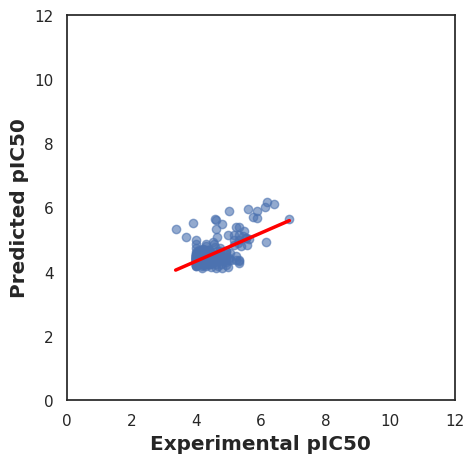

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white', color_codes=True)
plt.figure(figsize=(5, 5))

ax = sns.regplot(
    x=Y_test,
    y=Y_pred,
    ci=None,  # disable the confidence interval shading
    scatter_kws={'alpha': 0.6, 'zorder': 1},
    line_kws={'color': 'red', 'linewidth': 2.5, 'zorder': 2}
)

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

plt.show()


## **. Hyperparameter Tuning**
Improve the model by tuning hyperparameters like the number of trees (n_estimators), tree depth (max_depth), and others. You can use GridSearchCV or RandomizedSearchCV for this. Ran it Locally on the device as colab was taking a lot of time

In [ ]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


file_path = 'bioactivity_data_3class_pIC50_pubchem_fp.csv'
df = pd.read_csv(file_path)

# Preprocess
df.fillna(df.mean(), inplace=True)

# Features & target
X = df.drop(columns=['pIC50'])
y = df['pIC50']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Variance threshold
selection = VarianceThreshold(threshold=0.16)  # 0.8*(1-0.8)
X_sel = selection.fit_transform(X_scaled)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y, test_size=0.2, random_state=42
)

# Hyperparameter grid
param_grid = {
    'n_estimators':      [100, 200, 300],
    'max_depth':         [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':  [1, 2, 4],
    'max_features':      ['sqrt', 'log2', None],
    'bootstrap':         [True, False]
}

# GridSearchCV with error_score='raise'
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)

# Fit
grid_search.fit(X_train, y_train)

# Best model & evaluation
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)
r2  = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² score: {r2:.4f}")
print(f"MSE      : {mse:.4f}")

with open('evaluation_results_tuned.pkl', 'wb') as f:
    pickle.dump({
        'Best Parameters': grid_search.best_params_,
        'R² score': r2,
        'MSE': mse
    }, f)

with open('predictions_data_tuned.pkl', 'wb') as f:
    pickle.dump({'Actual': y_test, 'Predicted': y_pred}, f)

with open('best_random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('scaler.pkl','wb')   as f: pickle.dump(scaler,   f)
with open('selector.pkl','wb') as f: pickle.dump(selection, f)


## **10. Using the HyperTuned Model with the same data and Parameters**
Model was tuned locally refer to above cell for it

## **Loading the saved objects from training Model Locally**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
BASE = '/content/drive/MyDrive/Colab Notebooks/data/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle, pandas as pd


with open(BASE + 'evaluation_results_tuned.pkl','rb') as f:
    eval_res = pickle.load(f)
print("Evaluation:", eval_res)

with open(BASE + 'predictions_data_tuned.pkl','rb') as f:
    preds = pickle.load(f)
pred_df = pd.DataFrame(preds)
print("\nPredictions head:\n", pred_df.head())

with open(BASE + 'best_random_forest_model.pkl','rb') as f:
    model    = pickle.load(f)
with open(BASE + 'scaler.pkl','rb')   as f:
    scaler   = pickle.load(f)
with open(BASE + 'selector.pkl','rb') as f:
    selector = pickle.load(f)


Evaluation: {'Best Parameters': {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}, 'R² score': 0.37395919939185374, 'MSE': 0.15329552279578262}

Predictions head:
        Actual  Predicted
739  4.511026   4.317927
788  4.000000   4.379512
43   4.633204   4.496216
155  4.365624   4.362989
494  4.674484   4.350870


## Reavaluating on the Test set


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²   : {r2:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE  : {mae:.4f}")


R²   : 0.3740
MSE  : 0.1533
RMSE : 0.3915
MAE  : 0.2898


## Score

In [ ]:
df_new = pd.read_csv(BASE + 'bioactivity_data_3class_pIC50_pubchem_fp.csv')
df_new.fillna(df_new.mean(), inplace=True)

if 'pIC50' in df_new:
    X_new = df_new.drop(columns=['pIC50'])
else:
    X_new = df_new.copy()

X_scaled   = scaler.transform(X_new)
X_selected = selector.transform(X_scaled)

y_new_pred = model.predict(X_selected)

df_new['Predicted_pIC50'] = y_new_pred
print(df_new[['Predicted_pIC50']].head())


   Predicted_pIC50
0         4.314472
1         4.477595
2         4.182100
3         4.364194
4         4.257719


## **Plots**

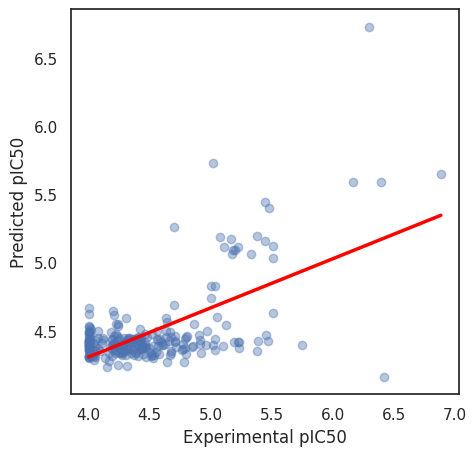

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

sns.set(style='white', color_codes=True)
plt.figure(figsize=(5,5))

sns.regplot(
    x=pred_df['Actual'],
    y=pred_df['Predicted'],
    ci=None,
    scatter_kws={'alpha':0.4, 'zorder': 1},
    line_kws={'color':'red', 'linewidth':2.5, 'zorder': 2}
)

plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
plt.show()


## **Saving the Results**

In [ ]:
df_new.to_csv('new_predictions.csv', index=False)
